In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open(r'F:\ABSA-BERT-pair-master\data\sentihood\sentihood-train.json') as f:
    data = json.load(f)

In [3]:
data[3]

{'opinions': [{'sentiment': 'Positive',
   'aspect': 'nightlife',
   'target_entity': 'LOCATION1'},
  {'sentiment': 'Positive',
   'aspect': 'transit-location',
   'target_entity': 'LOCATION1'}],
 'id': 209,
 'text': '  Another option is LOCATION1 which is very central and has tons of clubs/bars within walking distance of each other'}

In [64]:
with open(r'F:\ABSA-BERT-pair-master\data\sentihood\sentihood-train.json') as f:
    data = json.load(f)
    ret = []
    for d in data:
        text = d['text']
        
        sent_id = d['id']
        opinions = []
        targets = set()
        for opinion in d['opinions']:
            sentiment = opinion['sentiment']
            aspect = opinion['aspect']
            target_entity = opinion['target_entity']
            targets.add(target_entity)
            opinions.append((target_entity, aspect, sentiment))
        ret.append((sent_id, text, opinions))

In [65]:
len(ret)

2977

In [66]:
df=pd.DataFrame(ret, columns=["id", "text", "sentiment"])


In [67]:
df.shape

(2977, 3)

In [68]:
df.head()


,id,text,sentiment
0,1430,LOCATION1 is transforming and the prices w...,"[(LOCATION1, price, Negative)]"
1,2013,Along LOCATION1 there are lots of Electronic...,"[(LOCATION1, shopping, Positive)]"
2,1244,And LOCATION1 is ten mins direct on the tube...,"[(LOCATION1, transit-location, Positive)]"
3,209,Another option is LOCATION1 which is very ce...,"[(LOCATION1, nightlife, Positive), (LOCATION1,..."
4,2824,Best bet is around LOCATION2 and LOCATION1 a...,"[(LOCATION1, general, Positive), (LOCATION2, g..."


In [69]:
df['sentiment'][3]

[('LOCATION1', 'nightlife', 'Positive'),
 ('LOCATION1', 'transit-location', 'Positive')]

In [70]:
text_id=[]
text=[]
sentiments=[]
for i in range(len(df)):
    len_present=len(df['sentiment'][i])
    for j in range(len_present):
        text_id.append(df['id'][i])
        text.append(df['text'][i])
        sentiments.append(df['sentiment'][i][j])

In [71]:
len(sentiments)

3396

In [72]:
df=pd.DataFrame({"id":text_id, "text":text, "sentiment":sentiments})

In [73]:
df.head(10)

,id,text,sentiment
0,1430,LOCATION1 is transforming and the prices w...,"(LOCATION1, price, Negative)"
1,2013,Along LOCATION1 there are lots of Electronic...,"(LOCATION1, shopping, Positive)"
2,1244,And LOCATION1 is ten mins direct on the tube...,"(LOCATION1, transit-location, Positive)"
3,209,Another option is LOCATION1 which is very ce...,"(LOCATION1, nightlife, Positive)"
4,209,Another option is LOCATION1 which is very ce...,"(LOCATION1, transit-location, Positive)"
5,2824,Best bet is around LOCATION2 and LOCATION1 a...,"(LOCATION1, general, Positive)"
6,2824,Best bet is around LOCATION2 and LOCATION1 a...,"(LOCATION2, general, Positive)"
7,1835,Central London based taxis mostly refuse far...,"(LOCATION1, transit-location, Negative)"
8,1429,Don't go looking at places like LOCATION1 n...,"(LOCATION1, general, Negative)"
9,1429,Don't go looking at places like LOCATION1 n...,"(LOCATION1, live, Negative)"


In [74]:
df['location']=df['sentiment'].apply(lambda x: x[0])
df['aspect']=df['sentiment'].apply(lambda x: x[1])
df['polarity']=df['sentiment'].apply(lambda x: x[2])
# df['len_sent']=df['sentiment'].apply(lambda x: len(x))

In [75]:
df.head(10)

,id,text,sentiment,location,aspect,polarity
0,1430,LOCATION1 is transforming and the prices w...,"(LOCATION1, price, Negative)",LOCATION1,price,Negative
1,2013,Along LOCATION1 there are lots of Electronic...,"(LOCATION1, shopping, Positive)",LOCATION1,shopping,Positive
2,1244,And LOCATION1 is ten mins direct on the tube...,"(LOCATION1, transit-location, Positive)",LOCATION1,transit-location,Positive
3,209,Another option is LOCATION1 which is very ce...,"(LOCATION1, nightlife, Positive)",LOCATION1,nightlife,Positive
4,209,Another option is LOCATION1 which is very ce...,"(LOCATION1, transit-location, Positive)",LOCATION1,transit-location,Positive
5,2824,Best bet is around LOCATION2 and LOCATION1 a...,"(LOCATION1, general, Positive)",LOCATION1,general,Positive
6,2824,Best bet is around LOCATION2 and LOCATION1 a...,"(LOCATION2, general, Positive)",LOCATION2,general,Positive
7,1835,Central London based taxis mostly refuse far...,"(LOCATION1, transit-location, Negative)",LOCATION1,transit-location,Negative
8,1429,Don't go looking at places like LOCATION1 n...,"(LOCATION1, general, Negative)",LOCATION1,general,Negative
9,1429,Don't go looking at places like LOCATION1 n...,"(LOCATION1, live, Negative)",LOCATION1,live,Negative


In [76]:
df['aspect'].value_counts()

general             1180
price                500
transit-location     428
safety               352
live                 221
nightlife            158
shopping             143
multicultural        123
green-nature          95
dining                93
quiet                 54
touristy              49
Name: aspect, dtype: int64

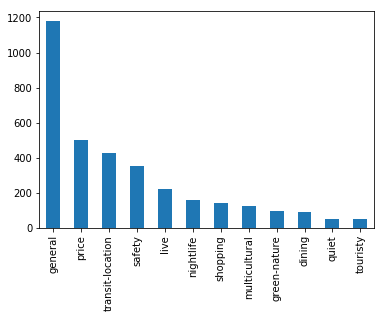

In [35]:
df['aspect'].value_counts().plot.bar()

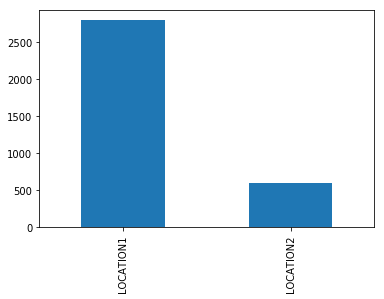

In [36]:
df['location'].value_counts().plot.bar()

In [37]:
len(list(set(df['aspect'])))

12

### Dev Set

In [38]:
with open(r'F:\ABSA-BERT-pair-master\data\sentihood\sentihood-dev.json') as f:
    data = json.load(f)
    ret = []
    for d in data:
        text = d['text']
        sent_id = d['id']
        opinions = []
        targets = set()
        for opinion in d['opinions']:
            sentiment = opinion['sentiment']
            aspect = opinion['aspect']
            target_entity = opinion['target_entity']
            targets.add(target_entity)
            opinions.append((target_entity, aspect, sentiment))
        ret.append((sent_id, text, opinions))
        
        
df=pd.DataFrame(ret, columns=["id", "text", "sentiment"])

print("df shape from json: ", df.shape)

text_id=[]
text=[]
sentiments=[]
for i in range(len(df)):
    len_present=len(df['sentiment'][i])
    for j in range(len_present):
        text_id.append(df['id'][i])
        text.append(df['text'][i])
        sentiments.append(df['sentiment'][i][j])

dev=pd.DataFrame({"id":text_id, "text":text, "sentiment":sentiments})
dev['location']=dev['sentiment'].apply(lambda x: x[0])
dev['aspect']=dev['sentiment'].apply(lambda x: x[1])
dev['polarity']=dev['sentiment'].apply(lambda x: x[2])
print("df shape after distinguishing dev set : ", dev.shape)

df shape from json:  (747, 3)
df shape after distinguishing dev set :  (838, 6)


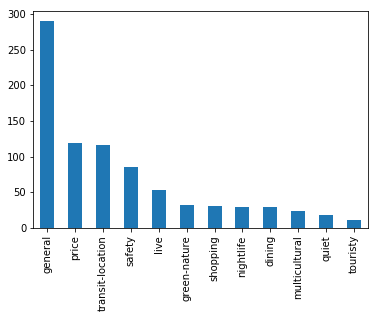

In [39]:
dev['aspect'].value_counts().plot.bar()

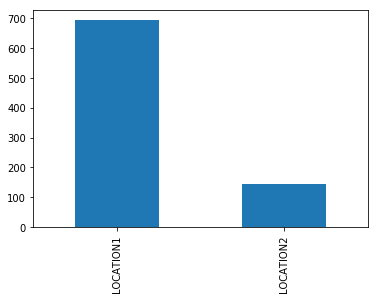

In [40]:
dev['location'].value_counts().plot.bar()

In [42]:
dev['polarity'].value_counts()

Positive    615
Negative    223
Name: polarity, dtype: int64

In [43]:
with open(r'F:\ABSA-BERT-pair-master\data\sentihood\sentihood-test.json') as f:
    data = json.load(f)
    ret = []
    for d in data:
        text = d['text']
        sent_id = d['id']
        opinions = []
        targets = set()
        for opinion in d['opinions']:
            sentiment = opinion['sentiment']
            aspect = opinion['aspect']
            target_entity = opinion['target_entity']
            targets.add(target_entity)
            opinions.append((target_entity, aspect, sentiment))
        ret.append((sent_id, text, opinions))
        
        
df=pd.DataFrame(ret, columns=["id", "text", "sentiment"])

print("df shape from json: ", df.shape)

text_id=[]
text=[]
sentiments=[]
for i in range(len(df)):
    len_present=len(df['sentiment'][i])
    for j in range(len_present):
        text_id.append(df['id'][i])
        text.append(df['text'][i])
        sentiments.append(df['sentiment'][i][j])

test=pd.DataFrame({"id":text_id, "text":text, "sentiment":sentiments})
test['location']=test['sentiment'].apply(lambda x: x[0])
test['aspect']=test['sentiment'].apply(lambda x: x[1])
test['polarity']=test['sentiment'].apply(lambda x: x[2])
print("df shape after distinguishing dev set : ", test.shape)

df shape from json:  (1491, 3)
df shape after distinguishing dev set :  (1677, 6)


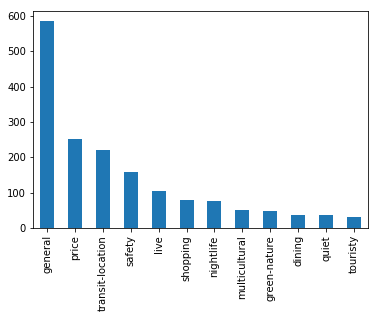

In [44]:
test['aspect'].value_counts().plot.bar()

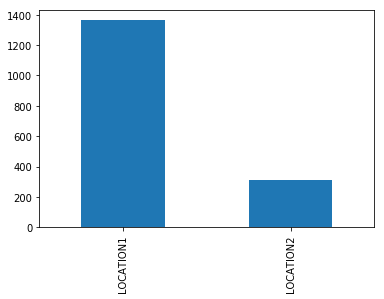

In [45]:
test['location'].value_counts().plot.bar()

In [46]:
test['polarity'].value_counts()

Positive    1215
Negative     462
Name: polarity, dtype: int64